In [1]:
# # For logging in to hugging face
# from huggingface_hub import notebook_login
# notebook_login()

In [2]:
# %reload_ext autoreload
# %autoreload 2
# from VLA2Systems.joint_inference import System2Inference
# config_path = "./configs/joint_inference.yaml"
# S2Model = System2Inference(config_path)


In [3]:
# random index from the dataset
# output = S2Model(1)

In [4]:
# print(output)

In [5]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
import torch
import imageio

# env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "BabyAI-OneRoomS8-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
env_name = "BabyAI-FindObjS5-v0"
# env_name = "BabyAI-BossLevel-v0"
# env_name = "MiniGrid-MultiRoom-N6-v0"
# env_name = "MiniGrid-MultiRoom-N4-S5-v0"
# env_name = "BabyAI-UnlockToUnlock-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
seed = random.randint(1, 1000)
env = gym.make(env_name, render_mode="rgb_array")
from VLA2Systems.joint_inference import System2Inference
config_path = "./configs/joint_inference.yaml"
# Clear cache
torch.cuda.empty_cache()

S2Model = System2Inference(config_path, env)



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

pick up the ball


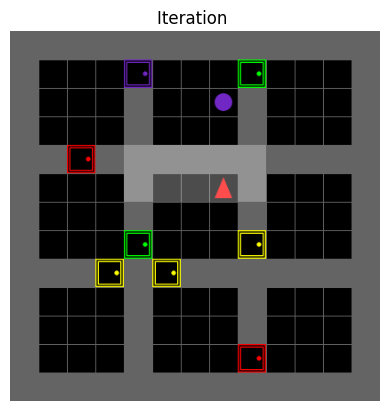

'Step 1: Open green door\nStep 2: Open purple door\nStep 3: Pick up the ball'

In [ ]:
prompt = S2Model.get_input(env)
output = S2Model(env)
n = len(prompt)
response = output[n:]
print(S2Model.generator.mission)
S2Model.generator.visualize()
print(response)

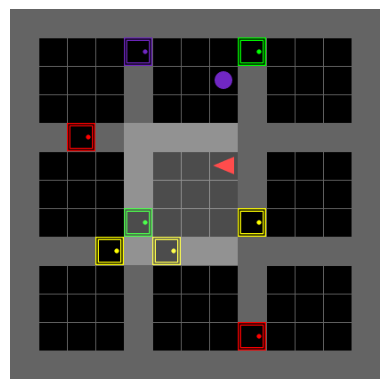

pick up the ball


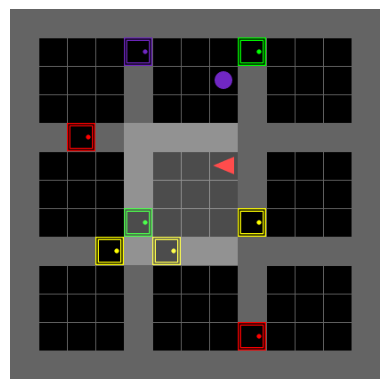

In [7]:
from VLA2Systems.joint_inference import System1Inferece
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
import torch
import imageio

env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# seed = random.randint(1, 1000)
# env = gym.make(env_name, render_mode="rgb_array")
config_path = "./configs/joint_inference.yaml"

S1Model = System1Inferece(config_path, env)
# obs, _ = env.reset(seed=seed)
S1Model.config.verify = False
obs = S2Model.get_obs()
S1Model.step(obs["mission"], obs)
S1Model.config.verify = True
# obs["mission"]

In [8]:
# sub_task = "go to the grey ball"
sub_task = response
print(sub_task)
S1Model.init_sub_task(sub_task, env)
S1Model.step_untill(sub_task, max_steps=100)


Step 1: Open green door
Step 2: Open purple door
Step 3: Pick up the ball


AssertionError: 